In [1]:
import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd scripts/smell-presence-analysis/

[Errno 2] No such file or directory: 'scripts/smell-presence-analysis/'
/home/gaspa/kth/thesis/thesis-utils/scripts/smell-presence-analysis


/nix/store/ll9mlsrgkjd7a6z6zz9s62pjyk85rpaj-python3-3.12.8-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [3]:
%run get_success_and_errors.py


Checking maven-runs...
Successes: 35
Successful folders:
  - results_2025-05-13-04-40-47
  - results_2025-05-13-05-58-19
  - results_2025-05-13-06-22-47
  - results_2025-05-13-02-03-14
  - results_2025-05-13-08-42-55
  - results_2025-05-13-02-47-58
  - results_2025-05-13-11-39-32
  - results_2025-05-13-09-27-04
  - results_2025-05-13-03-21-19
  - results_2025-05-13-02-20-06
  - results_2025-05-13-09-01-36
  - results_2025-05-13-02-34-35
  - results_2025-05-13-11-23-14
  - results_2025-05-13-10-28-16
  - results_2025-05-13-03-43-29
  - results_2025-05-13-09-44-13
  - results_2025-05-13-01-46-07
  - results_2025-05-13-08-09-14
  - results_2025-05-13-10-08-53
  - results_2025-05-13-05-27-35
  - results_2025-05-13-09-08-41
  - results_2025-05-13-03-05-48
  - results_2025-05-13-04-20-04
  - results_2025-05-13-05-02-49
  - results_2025-05-13-07-45-54
  - results_2025-05-13-06-33-33
  - results_2025-05-13-12-03-46
  - results_2025-05-13-00-52-38
  - results_2025-05-13-06-58-01
  - results_20

In [4]:
%run check_transparency.py


Analyzing maven-runs_success.json...
Skipping package 'None' in swagger-api/swagger-core
Skipping package 'None' in FasterXML/jackson-dataformat-xml
Found org.apache.velocity:velocity-tools@2.0 in FasterXML/jackson-dataformat-xml
Skipping package 'None' in javaee/jaxb-spec
Found org.apache.velocity:velocity-tools@2.0 in javaee/jaxb-spec
Skipping package 'None' in dropwizard/metrics
Found org.apache.velocity:velocity-tools@2.0 in jakartaee/validation
Found org.apache.velocity:velocity-tools@2.0 in jakartaee/jaxb-api
Found org.apache.velocity:velocity-tools@2.0 in easymock/easymock
Skipping package 'None' in qos-ch/logback
Found org.apache.velocity:velocity-tools@2.0 in qos-ch/logback
Skipping package 'None' in apache/maven
Found org.apache.velocity:velocity-tools@2.0 in apache/maven
Skipping package 'None' in google/guice
Found org.apache.velocity:velocity-tools@2.0 in google/guice
Found org.apache.velocity:velocity-tools@2.0 in netty/netty
Found org.apache.velocity:velocity-tools@2.0 

In [5]:
OUTCOMES_FOLDER = "results/outcomes"
PACKAGE_MANAGERS = ["maven", "npm"]
COUNTS = ["counts"]
RAN_OR_NOT = ["failures", "success"]
PATTERN = "{}/{}-runs_{}.json"

FAILURE_REASONS = {
  "maven": {
    "results_2025-05-13-00-52-34": "mvn dependency:tree error",
    "results_2025-05-13-06-33-25": "mvn dependency:resolve-plugins error",
    "results_2025-05-13-08-24-20": "mvn dependency:tree error",
    "results_2025-05-13-10-08-49": "mvn dependency:tree error",
  },
  "npm": {
    "results_2025-05-13-00-32-41": "unsupported package-lock.json version",
    "results_2025-05-13-00-40-05": "unsupported package-lock.json version",
    "results_2025-05-13-00-49-06": "unsupported package-lock.json version",
    "results_2025-05-13-00-49-05": "unsupported package-lock.json version",
    "results_2025-05-13-00-32-42": "unsupported package-lock.json version",
    "results_2025-05-13-00-29-15": "unsupported package-lock.json version",
    "results_2025-05-13-00-52-16": "unsupported package-lock.json version",
    "results_2025-05-13-00-31-16": "unsupported package-lock.json version",
  },
}

In [6]:
runs = {
  pm: {
    runs: pd.read_json(PATTERN.format(OUTCOMES_FOLDER, pm, runs)).values.flatten().tolist()
    for runs in RAN_OR_NOT
  }
  for pm in PACKAGE_MANAGERS
}
json.dumps(runs)

'{"maven": {"failures": ["results_2025-05-13-00-52-34", "results_2025-05-13-06-33-25", "results_2025-05-13-08-24-20", "results_2025-05-13-10-08-49"], "success": ["results_2025-05-13-04-40-47", "results_2025-05-13-05-58-19", "results_2025-05-13-06-22-47", "results_2025-05-13-02-03-14", "results_2025-05-13-08-42-55", "results_2025-05-13-02-47-58", "results_2025-05-13-11-39-32", "results_2025-05-13-09-27-04", "results_2025-05-13-03-21-19", "results_2025-05-13-02-20-06", "results_2025-05-13-09-01-36", "results_2025-05-13-02-34-35", "results_2025-05-13-11-23-14", "results_2025-05-13-10-28-16", "results_2025-05-13-03-43-29", "results_2025-05-13-09-44-13", "results_2025-05-13-01-46-07", "results_2025-05-13-08-09-14", "results_2025-05-13-10-08-53", "results_2025-05-13-05-27-35", "results_2025-05-13-09-08-41", "results_2025-05-13-03-05-48", "results_2025-05-13-04-20-04", "results_2025-05-13-05-02-49", "results_2025-05-13-07-45-54", "results_2025-05-13-06-33-33", "results_2025-05-13-12-03-46", "

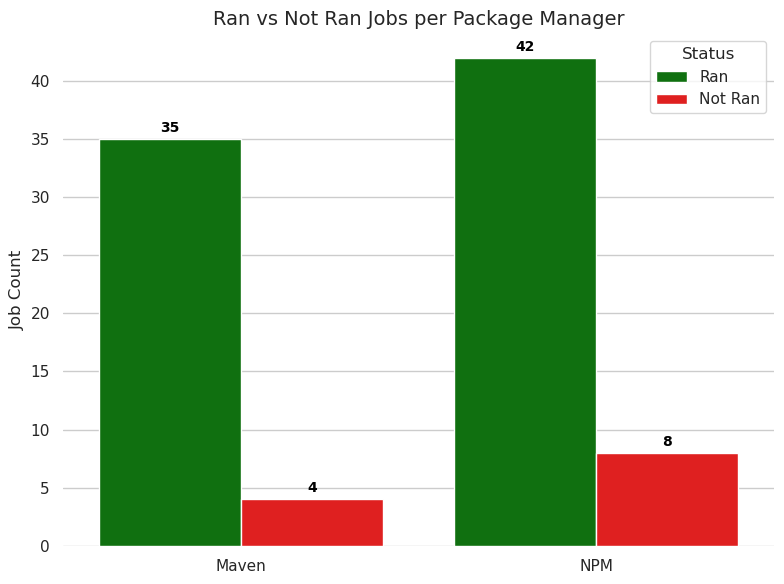

In [7]:
data = {
    'Package Manager': ['Maven', 'Maven', 'NPM', 'NPM'],
    'Status': ['Ran', 'Not Ran', 'Ran', 'Not Ran'],
    'Count': [len(runs["maven"]["success"]), len(runs["maven"]["failures"]), len(runs["npm"]["success"]), len(runs["npm"]["failures"])],
}

df = pd.DataFrame(data)

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Package Manager', y='Count', hue='Status', palette={'Ran': 'green', 'Not Ran': 'red'}, dodge=True)
sns.despine(left=True, bottom=True)

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=10, color='black', weight='bold')
plt.title('Ran vs Not Ran Jobs per Package Manager', fontsize=14)
plt.ylabel('Job Count')
plt.xlabel('')
plt.tight_layout()
plt.show()

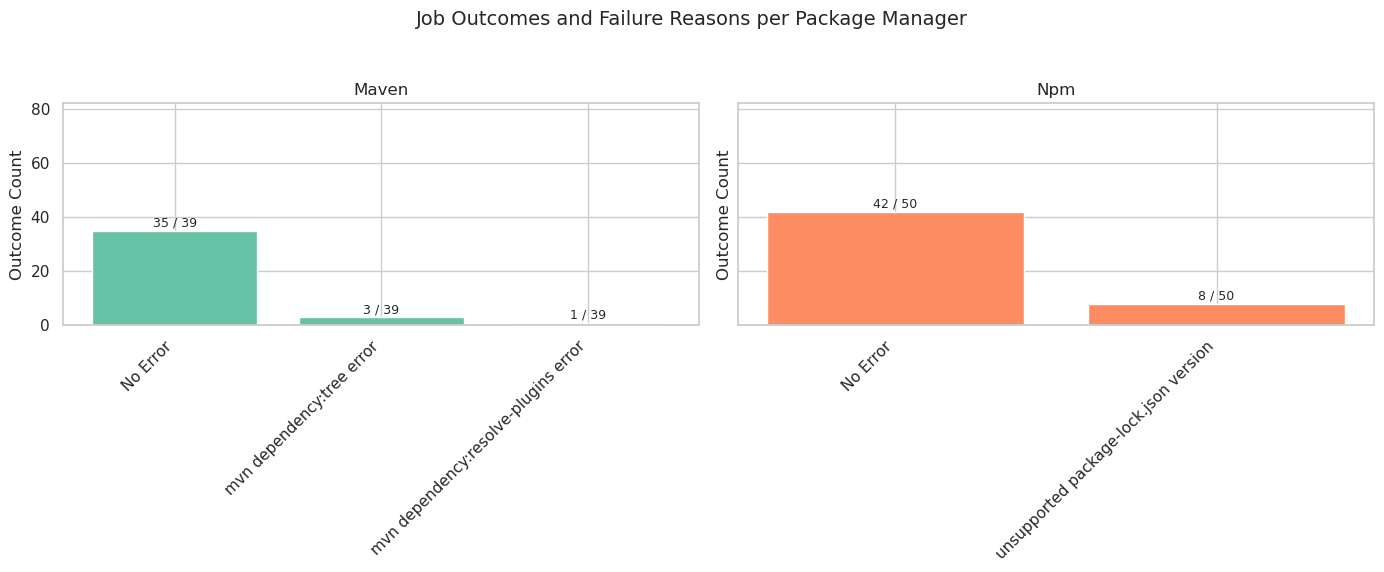

In [8]:

success_counts = {
    "maven": len(runs["maven"]["success"]),
    "npm": len(runs["npm"]["success"]),
}

records = []
for manager, failures in FAILURE_REASONS.items():
    for _, reason in failures.items():
        records.append({'Package Manager': manager.capitalize(), 'Reason': reason})

for manager, count in success_counts.items():
    for _ in range(count):
        records.append({'Package Manager': manager.capitalize(), 'Reason': 'No Error'})

df = pd.DataFrame(records)

managers = ['Maven', 'Npm']
colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for ax, manager in zip(axes, managers):
    subset = df[df['Package Manager'] == manager]
    total_runs = subset.shape[0]
    reason_counts = subset['Reason'].value_counts()

    bars = ax.bar(reason_counts.index, reason_counts.values, color=colors[manager])
    ax.set_title(manager)
    ax.set_ylabel("Outcome Count")
    ax.set_xticks(range(len(reason_counts)))
    ax.set_xticklabels(reason_counts.index, rotation=45, ha='right')
    ax.set_ylim(0, df['Reason'].value_counts().max() + 5)

    # Annotate bars with <count>/<total>
    for bar, count in zip(bars, reason_counts.values):
        label = f"{count} / {total_runs}"
        ax.text(bar.get_x() + bar.get_width() / 2, count + 0.3, label,
                ha='center', va='bottom', fontsize=9)

# Shared title and layout
fig.suptitle("Job Outcomes and Failure Reasons per Package Manager", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
counts = {
    pm: pd.read_json(PATTERN.format(OUTCOMES_FOLDER, pm, "counts")).to_dict()
    for pm in PACKAGE_MANAGERS
}
json.dumps(counts)

'{"maven": {"maven-runs/results_2025-05-13-04-40-47": {"total": 479, ":wrench: Packages with inaccessible commit SHA/tag \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 38, ":heavy_exclamation_mark: Packages with no source code URL \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 21, ":no_entry: Packages with repo URL that is 404 \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 5, ":black_square_button: Packages without build attestation \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 0, ":unlock: Packages with invalid code signature \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 11, ":lock: Packages without code signature \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 81, ":x: Packages that are deprecated \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 0, ":alien: Packages that are aliased \\\\(\\u26a0\\ufe0f\\u26a0\\ufe0f\\\\):\\\\s*(\\\\d+)": 0}

Run: maven-runs/results_2025-05-13-04-40-47, Smell: :wrench: Packages with inaccessible commit SHA/tag \(⚠️⚠️⚠️⚠️\):\s*(\d+), Count: 38, Percentage: 7.93%
Run: maven-runs/results_2025-05-13-05-58-19, Smell: :wrench: Packages with inaccessible commit SHA/tag \(⚠️⚠️⚠️⚠️\):\s*(\d+), Count: 69, Percentage: 15.51%
Run: maven-runs/results_2025-05-13-06-22-47, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 13, Percentage: 5.37%
Run: maven-runs/results_2025-05-13-02-03-14, Smell: :wrench: Packages with inaccessible commit SHA/tag \(⚠️⚠️⚠️⚠️\):\s*(\d+), Count: 52, Percentage: 15.95%
Run: maven-runs/results_2025-05-13-08-42-55, Smell: :wrench: Packages with inaccessible commit SHA/tag \(⚠️⚠️⚠️⚠️\):\s*(\d+), Count: 22, Percentage: 5.42%
Run: maven-runs/results_2025-05-13-02-47-58, Smell: :wrench: Packages with inaccessible commit SHA/tag \(⚠️⚠️⚠️⚠️\):\s*(\d+), Count: 54, Percentage: 14.48%
Run: maven-runs/results_2025-05-13-11-39-32, Smell: :wrench: P

/tmp/ipykernel_219176/2905161757.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=df, x='Package Manager', y='Critical Smells', palette='Blues')


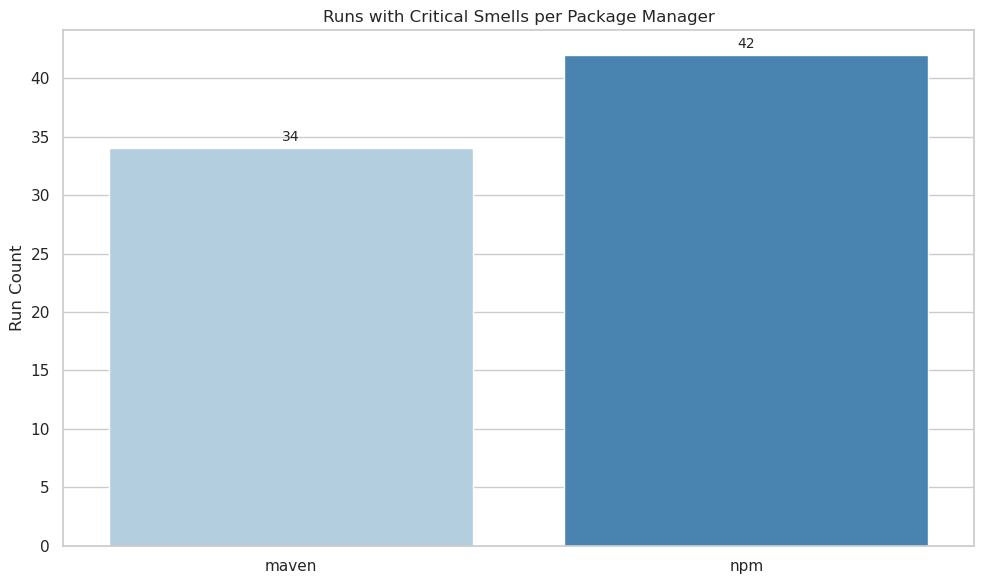

/tmp/ipykernel_219176/2905161757.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=df, x='Package Manager', y='Runs with 5% or more Smells', palette='Oranges')


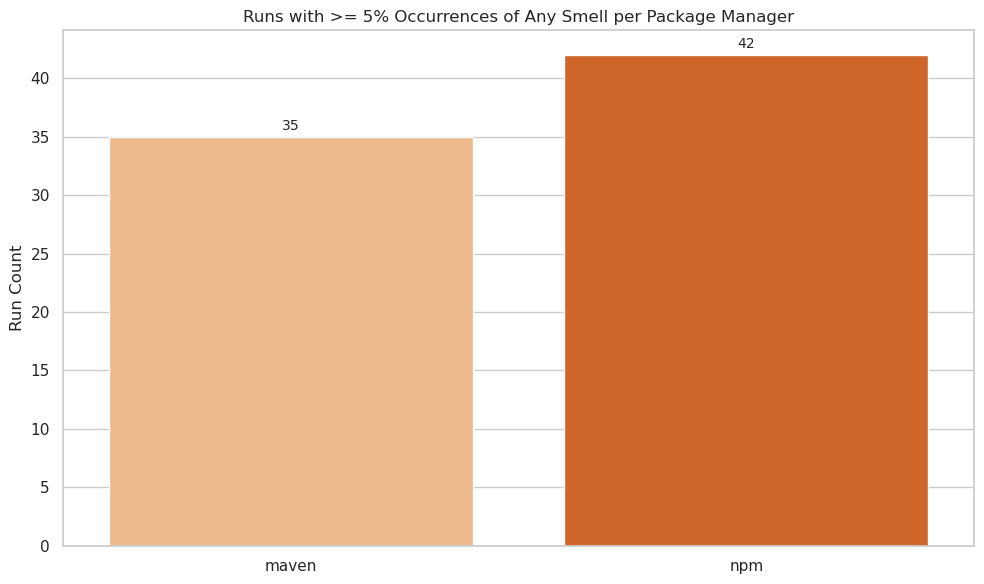

In [10]:
smell_severities = {
    'critical': '⚠️⚠️⚠️⚠️',
    'high': '⚠️⚠️⚠️',
    'medium': '⚠️⚠️',
    'low': '⚠️'
}

data = []
for manager, runs in counts.items():
    critical_run_count = 0
    total_run_count = 0
    five_percent_run_count = 0
    
    for run, issues in runs.items():
        total = issues['total']
        total_run_count += 1
        
        # Count critical smells with count higher than 0
        critical_found = any(smell_severities['critical'] in key and count > 0 for key, count in issues.items())
        if critical_found:
            critical_run_count += 1
        
        # Count runs with at least 5% of total occurrences for any smell
        for key, count in issues.items():
            if count > 0:
                if any(smell in key for smell in smell_severities.values()):
                    percentage = count / total
                    if percentage >= 0.05:  # At least 5%
                        five_percent_run_count += 1
                        print(f"Run: {run}, Smell: {key}, Count: {count}, Percentage: {percentage:.2%}")
                        break  # Once we find any smell above 5%, we stop checking further for that run

    # Add the counts for this package manager to the data
    data.append({
        'Package Manager': manager,
        'Critical Smells': critical_run_count,
        'Runs with 5% or more Smells': five_percent_run_count,
        'Total Runs': total_run_count
    })

df = pd.DataFrame(data)

# Plot 1: Critical Smells
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax1 = sns.barplot(data=df, x='Package Manager', y='Critical Smells', palette='Blues')
ax1.set_title("Runs with Critical Smells per Package Manager")
ax1.set_ylabel("Run Count")
ax1.set_xlabel("")
for container in ax1.containers:
    ax1.bar_label(container, padding=3, fontsize=10)
plt.tight_layout()
plt.show()

# Plot 2: Runs with 5% or more Smells (Critical, High, Medium, Low)
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax2 = sns.barplot(data=df, x='Package Manager', y='Runs with 5% or more Smells', palette='Oranges')
ax2.set_title("Runs with >= 5% Occurrences of Any Smell per Package Manager")
ax2.set_ylabel("Run Count")
ax2.set_xlabel("")
for container in ax2.containers:
    ax2.bar_label(container, padding=3, fontsize=10)
plt.tight_layout()
plt.show()

In [11]:
threshold = 0.05

# Map full smell keys to display labels
smell_labels = {
    ":wrench: Packages with inaccessible commit SHA/tag \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️⚠️) Inaccessible SHA/tag",
    ":heavy_exclamation_mark: Packages with no source code URL \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) No Source Code URL",
    ":no_entry: Packages with repo URL that is 404 \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) 404 Source Code URL",
    ":black_square_button: Packages without build attestation \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) No Build Attestation",
    ":unlock: Packages with invalid code signature \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️⚠️) Invalid Code Signature",
    ":lock: Packages without code signature \\(\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️) No Code Signature",
    ":x: Packages that are deprecated \\(\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️) Deprecated",
    ":alien: Packages that are aliased \\(\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)": "(⚠️⚠️) Aliased",
}

# Smells not applicable to Maven
not_applicable_smells_for_maven = {
    "(⚠️⚠️⚠️) No Build Attestation",
    "(⚠️⚠️) Deprecated",
    "(⚠️⚠️) Aliased"
}

data = {}
for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']
        for key, count in metrics.items():
            if key == 'total' or key not in smell_labels:
                continue
            label = smell_labels[key]
            data.setdefault(label, {}).setdefault(manager, {'breaks': 0, 'has_smell': 0, 'total': 0})
            data[label][manager]['total'] += 1
            if count > 0 and count / total < threshold:
                data[label][manager]['has_smell'] += 1  # Below threshold but smell present
            if count / total >= threshold:
                data[label][manager]['breaks'] += 1  # CI Breaks

records = []
for smell, by_manager in data.items():
    for manager, stats in by_manager.items():
        records.append({
            'Smell': smell,
            'Package Manager': manager.capitalize(),
            'Breaks': stats['breaks'],
            'Has Smell': stats['has_smell'],
            'Total': stats['total']
        })

df = pd.DataFrame(records)

# Filter out not applicable smells for Maven
df_filtered = df[~((df['Package Manager'] == 'Maven') & (df['Smell'].isin(not_applicable_smells_for_maven)))]


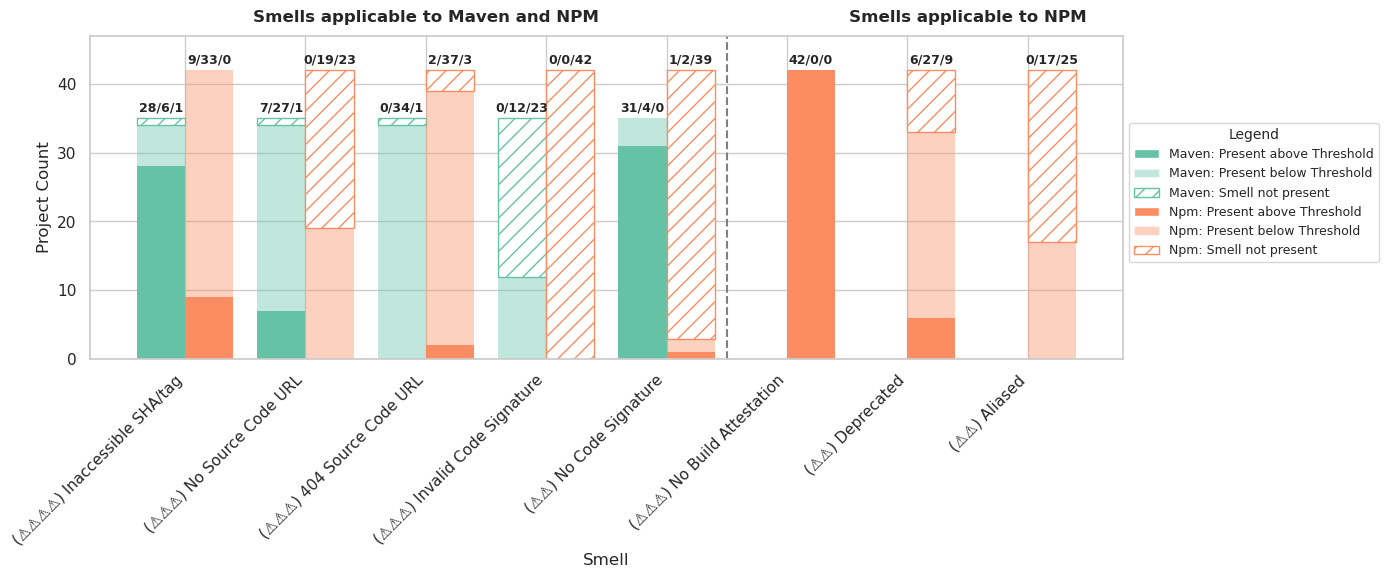

In [12]:
from matplotlib.patches import Patch

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))

# Bar setup
bar_width = 0.4
# Reorder x_labels: non-N/A first, then N/A
applicable_smells = [smell for smell in df['Smell'].unique() if smell not in not_applicable_smells_for_maven]
not_applicable_smells = [smell for smell in df['Smell'].unique() if smell in not_applicable_smells_for_maven]
x_labels = applicable_smells + not_applicable_smells

x = range(len(x_labels))
position_map = {
    (smell, 'Maven'): i - bar_width / 2
    for i, smell in enumerate(x_labels)
}
position_map.update({
    (smell, 'Npm'): i + bar_width / 2
    for i, smell in enumerate(x_labels)
})

# Convert df_filtered to lookup
df_lookup = {
    (row['Smell'], row['Package Manager']): row
    for _, row in df_filtered.iterrows()
}

colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}
plotted_positions = []

for smell in x_labels:
    skipped = False
    for manager in ['Maven', 'Npm']:
        key = (smell, manager)
        pos = position_map[key]
        plotted_positions.append(pos)

        # Skip N/A bars for Maven
        if (manager == 'Maven') and (smell in not_applicable_smells_for_maven):
            skipped = True
            continue

        if key not in df_lookup:
            continue

        row = df_lookup[key]
        total = row['Total']
        breaks = row['Breaks']
        has_smell = row['Has Smell']
        no_smell = total - (breaks + has_smell)

        # Draw bottom-up: breaks -> has_smell -> no_smell
        current_bottom = 0

        if breaks > 0:
            plt.bar(pos, breaks, width=bar_width, color=colors[manager], linewidth=0)
            current_bottom += breaks

        if has_smell > 0:
            plt.bar(pos, has_smell, bottom=current_bottom, width=bar_width,
                    color=colors[manager], alpha=0.4, linewidth=0)
            current_bottom += has_smell

        if no_smell > 0:
            plt.bar(pos, no_smell, bottom=current_bottom, width=bar_width,
                    color='white', edgecolor=colors[manager], hatch='//', linewidth=1)

        # Top label with breakdown
        plt.text(
            pos,
            total + 0.5,
            f"{breaks}/{has_smell}/{no_smell}",
            ha='center',
            va='bottom',
            fontsize=9,
            weight='bold'
        )

# Add vertical separator line
if not_applicable_smells:
    separator_index = len(applicable_smells) - 0.5
    plt.axvline(x=separator_index, color='gray', linestyle='--', linewidth=1.5)

# Add section labels
if applicable_smells:
    plt.text(
        x=len(applicable_smells) / 2 - 0.5,
        y=max(df['Total']) + 7,
        s="Smells applicable to Maven and NPM",
        ha='center',
        fontsize=12,
        weight='bold'
    )

if not_applicable_smells:
    plt.text(
        x=len(applicable_smells) + len(not_applicable_smells) / 2,
        y=max(df['Total']) + 7,
        s="Smells applicable to NPM",
        ha='center',
        fontsize=12,
        weight='bold'
    )


plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=45, ha='right')
plt.ylabel("Project Count")
plt.xlabel("Smell")
legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven: Present above Threshold'),
    Patch(facecolor=colors['Maven'], alpha=0.4, label='Maven: Present below Threshold'),
    Patch(facecolor='none', edgecolor=colors['Maven'], hatch='//', label='Maven: Smell not present'),
    Patch(facecolor=colors['Npm'], label='Npm: Present above Threshold'),
    Patch(facecolor=colors['Npm'], alpha=0.4, label='Npm: Present below Threshold'),
    Patch(facecolor='none', edgecolor=colors['Npm'], hatch='//', label='Npm: Smell not present'),
]
plt.legend(handles=legend_handles, title="Legend", fontsize=9, title_fontsize=10,
           loc='upper left', bbox_to_anchor=(1, 0.75), borderaxespad=0.5)

plt.ylim(top=max(df['Total']) + 5)
plt.tight_layout()
plt.show()

In [13]:
# Print in which projects the "No Source Code URL" smell was found; also print the count of the specific smell in the project
for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']
        for key, count in metrics.items():
            if key == 'total' or key not in smell_labels:
                continue
            if count > 0 and key == ":heavy_exclamation_mark: Packages with no source code URL \\(\u26a0\ufe0f\u26a0\ufe0f\u26a0\ufe0f\\):\\s*(\\d+)":
                print(f"Run: {run_id}, Smell: {key}, Count: {count}, Percentage: {count / total:.2%}")

Run: maven-runs/results_2025-05-13-04-40-47, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 21, Percentage: 4.38%
Run: maven-runs/results_2025-05-13-05-58-19, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 9, Percentage: 2.02%
Run: maven-runs/results_2025-05-13-06-22-47, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 13, Percentage: 5.37%
Run: maven-runs/results_2025-05-13-02-03-14, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 5, Percentage: 1.53%
Run: maven-runs/results_2025-05-13-08-42-55, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 16, Percentage: 3.94%
Run: maven-runs/results_2025-05-13-02-47-58, Smell: :heavy_exclamation_mark: Packages with no source code URL \(⚠️⚠️⚠️\):\s*(\d+), Count: 10, Percentage: 2.68%
Run: maven-runs/results_2025-05-13-11-39-3

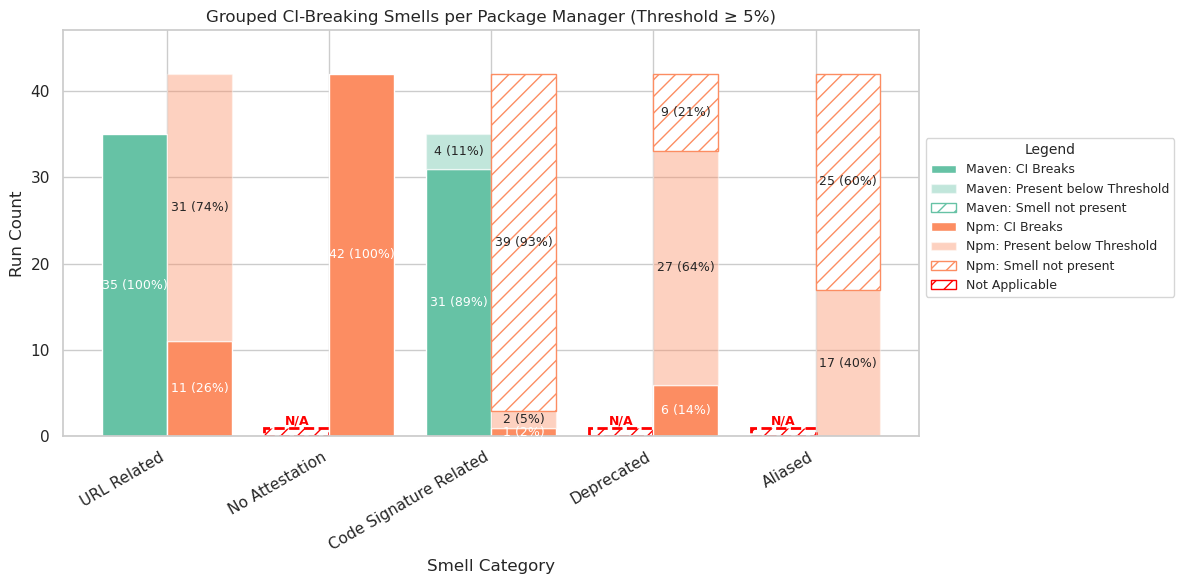

In [14]:
group_map = {
    "(⚠️⚠️⚠️⚠️) Inaccessible SHA/tag": "URL Related",
    "(⚠️⚠️⚠️) No Source Code URL": "URL Related",
    "(⚠️⚠️⚠️) 404 Source Code URL": "URL Related",
    "(⚠️⚠️) No Code Signature": "Code Signature Related",
    "(⚠️⚠️⚠️) Invalid Code Signature": "Code Signature Related",
    "(⚠️⚠️⚠️) No Build Attestation": "No Attestation",
    "(⚠️⚠️) Deprecated": "Deprecated",
    "(⚠️⚠️) Aliased": "Aliased"
}

# Define non-applicable groups for Maven
not_applicable_groups_for_maven = {"No Attestation", "Deprecated", "Aliased"}

grouped_data = {}
for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']

        # Skip non-applicable groups entirely for Maven
        group_stats = {}
        for full_key, count in metrics.items():
            if full_key == 'total':
                continue

            label = next((v for k, v in smell_labels.items() if k == full_key), None)
            if not label or label not in group_map:
                continue

            group = group_map[label]
            if manager == 'maven' and group in not_applicable_groups_for_maven:
                continue

            group_stats.setdefault(group, {'breaks': False, 'has_smell': False})

            if count / total >= threshold:
                group_stats[group]['breaks'] = True
            elif count > 0:
                group_stats[group]['has_smell'] = True

        for group, flags in group_stats.items():
            grouped_data.setdefault(group, {}).setdefault(manager, {
                'breaks': 0, 'has_smell': 0, 'no_smell': 0, 'total': 0
            })
            stats = grouped_data[group][manager]
            stats['total'] += 1
            if flags['breaks']:
                stats['breaks'] += 1
            elif flags['has_smell']:
                stats['has_smell'] += 1
            else:
                stats['no_smell'] += 1

records = []
for group in sorted(set(grouped_data) | not_applicable_groups_for_maven):
    for manager in ['Maven', 'Npm']:
        if manager.lower() not in grouped_data.get(group, {}):
            # Mark non-applicable
            records.append({
                'Group': group,
                'Package Manager': manager,
                'Breaks': None,
                'Has Smell': None,
                'No Smell': None,
                'Total': None,
                'Applicable': not (manager == 'Maven' and group in not_applicable_groups_for_maven)
            })
        else:
            stats = grouped_data[group][manager.lower()]
            records.append({
                'Group': group,
                'Package Manager': manager,
                'Breaks': stats['breaks'],
                'Has Smell': stats['has_smell'],
                'No Smell': stats['no_smell'],
                'Total': stats['total'],
                'Applicable': True
            })

df = pd.DataFrame(records)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
bar_width = 0.4
# Desired group order in the plot
group_order = [
    "URL Related",
    "No Attestation",
    "Code Signature Related",
    "Deprecated",
    "Aliased"
]

df['Group'] = pd.Categorical(df['Group'], categories=group_order, ordered=True)
# Re-sort DataFrame by the new category order
df = df.sort_values(by='Group')

x_labels = df['Group'].unique()
position_map = {
    (group, 'Maven'): i - bar_width / 2 for i, group in enumerate(x_labels)
}
position_map.update({
    (group, 'Npm'): i + bar_width / 2 for i, group in enumerate(x_labels)
})
# Ensure count columns are integers (nullable Int64 allows for NaNs)
for col in ['Breaks', 'Has Smell', 'No Smell', 'Total']:
    df[col] = df[col].astype('Int64')

for group in x_labels:
    for manager in ['Maven', 'Npm']:
        row = df[(df['Group'] == group) & (df['Package Manager'] == manager)].iloc[0]
        pos = position_map[(group, manager)]

        if not row['Applicable']:
            plt.bar(pos, 1, width=bar_width, color='none', edgecolor='red',
                    hatch='//', linestyle='--', linewidth=2)
            plt.text(pos, 1.02, "N/A", ha='center', va='bottom',
                     fontsize=9, color='red', weight='bold')
            continue

        total = row['Total']
        breaks = row['Breaks']
        has_smell = row['Has Smell']
        no_smell = row['No Smell']
        color = colors[manager]

        bottom = 0
        if breaks:
            plt.bar(pos, breaks, width=bar_width, color=color)
            plt.text(pos, bottom + breaks / 2, f"{breaks} ({breaks/total:.0%})", ha='center', va='center', color='white', fontsize=9)
            bottom += breaks
        if has_smell:
            plt.bar(pos, has_smell, width=bar_width, bottom=bottom, color=color, alpha=0.4)
            plt.text(pos, bottom + has_smell / 2, f"{has_smell} ({has_smell/total:.0%})", ha='center', va='center', fontsize=9)
            bottom += has_smell
        if no_smell:
            plt.bar(pos, no_smell, width=bar_width, bottom=bottom, color='white', edgecolor=color, hatch='//')
            plt.text(pos, bottom + no_smell / 2, f"{no_smell} ({no_smell/total:.0%})", ha='center', va='center', fontsize=9)

plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=30, ha='right')
plt.title("Grouped CI-Breaking Smells per Package Manager (Threshold ≥ 5%)")
plt.ylabel("Run Count")
plt.xlabel("Smell Category")
legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven: CI Breaks'),
    Patch(facecolor=colors['Maven'], alpha=0.4, label='Maven: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Maven'], hatch='//', label='Maven: Smell not present'),
    Patch(facecolor=colors['Npm'], label='Npm: CI Breaks'),
    Patch(facecolor=colors['Npm'], alpha=0.4, label='Npm: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Npm'], hatch='//', label='Npm: Smell not present'),
    Patch(facecolor='none', edgecolor='red', hatch='//', label='Not Applicable')
]
plt.legend(handles=legend_handles, title="Legend", fontsize=9, title_fontsize=10,
           loc='upper left', bbox_to_anchor=(1.0, 0.75), borderaxespad=0.5)

plt.ylim(top=max(df['Total'].dropna()) + 5)
plt.tight_layout()
plt.show()

In [15]:
# Determine severity based on number of ⚠️ signs
def get_severity(label):
    severities = {
        "1": ["Low", "⚠️"],
        "2": ["Medium", "⚠️⚠️"],
        "3": ["High", "⚠️⚠️⚠️"],
        "4": ["Critical", "⚠️⚠️⚠️⚠️"]
    }
    count = label.count('⚠️')
    return f"{severities.get(str(count), ['Unknown'])[0]} Severity ({severities.get(str(count), ['Unknown'])[1]})"

# Define non-applicable severities for Maven (same as previous logic)
non_applicable_labels = {
    "(⚠️⚠️⚠️) No Build Attestation",
    "(⚠️⚠️) Deprecated",
    "(⚠️⚠️) Aliased"
}

grouped_data = {}

for manager, runs in counts.items():
    for run_id, metrics in runs.items():
        total = metrics['total']

        group_stats = {}
        for full_key, count in metrics.items():
            if full_key == 'total':
                continue

            label = next((v for k, v in smell_labels.items() if k == full_key), None)
            if not label:
                continue

            severity = get_severity(label)
            group_stats.setdefault(severity, {'breaks': False, 'has_smell': False})

            if count / total >= threshold:
                group_stats[severity]['breaks'] = True
            elif count > 0:
                group_stats[severity]['has_smell'] = True

        for severity, flags in group_stats.items():
            grouped_data.setdefault(severity, {}).setdefault(manager, {
                'breaks': 0, 'has_smell': 0, 'no_smell': 0, 'total': 0
            })
            stats = grouped_data[severity][manager]
            stats['total'] += 1
            if flags['breaks']:
                stats['breaks'] += 1
            elif flags['has_smell']:
                stats['has_smell'] += 1
            else:
                stats['no_smell'] += 1

records = []
severity_order = {
    "Critical Severity (⚠️⚠️⚠️⚠️)": 4,
    "High Severity (⚠️⚠️⚠️)": 3,
    "Medium Severity (⚠️⚠️)": 2,
    "Low Severity (⚠️)": 1,
    "Unknown Severity": 0
}
all_severities = sorted(set(grouped_data), key=lambda x: severity_order.get(x, 0), reverse=True)

for severity in all_severities:
    for manager in ['Maven', 'Npm']:
        if manager.lower() not in grouped_data.get(severity, {}):
            # Mark non-applicable
            records.append({
                'Severity': severity,
                'Package Manager': manager,
                'Breaks': None,
                'Has Smell': None,
                'No Smell': None,
                'Total': None,
            })
        else:
            stats = grouped_data[severity][manager.lower()]
            records.append({
                'Severity': severity,
                'Package Manager': manager,
                'Breaks': stats['breaks'],
                'Has Smell': stats['has_smell'],
                'No Smell': stats['no_smell'],
                'Total': stats['total'],
            })

df = pd.DataFrame(records)

Severity: Critical Severity (⚠️⚠️⚠️⚠️), No Smell: 1, Row: Severity           Critical Severity (⚠️⚠️⚠️⚠️)
Package Manager                           Maven
Breaks                                       28
Has Smell                                     6
No Smell                                      1
Total                                        35
Name: 0, dtype: object


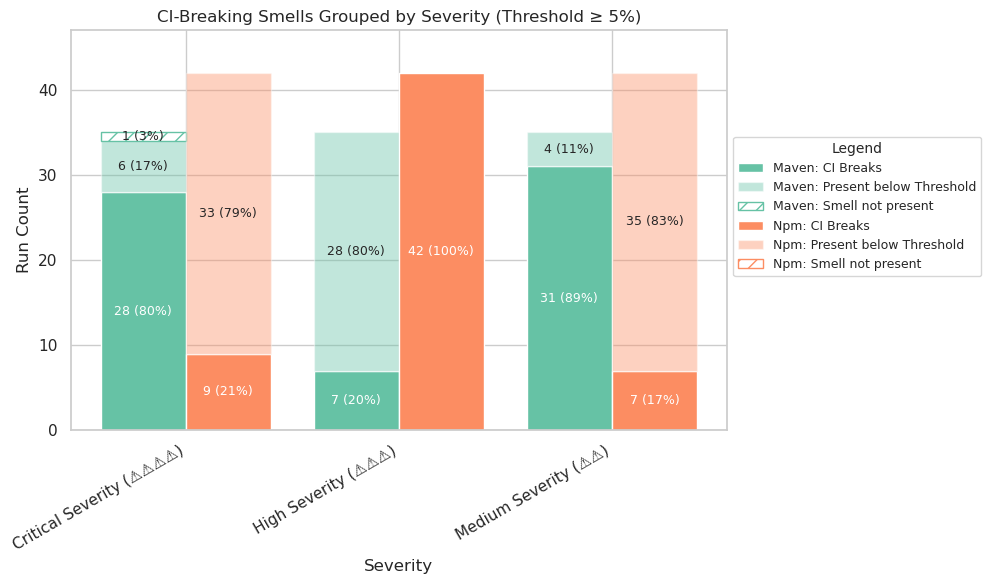

In [16]:
plt.figure(figsize=(10, 6))

colors = {'Maven': '#66c2a5', 'Npm': '#fc8d62'}
bar_width = 0.4

df['Severity'] = pd.Categorical(df['Severity'], categories=all_severities, ordered=True)
df = df.sort_values(by='Severity')

x_labels = df['Severity'].unique()
position_map = {
    (severity, 'Maven'): i - bar_width / 2 for i, severity in enumerate(x_labels)
}
position_map.update({
    (severity, 'Npm'): i + bar_width / 2 for i, severity in enumerate(x_labels)
})

# Ensure count columns are integers (nullable)
for col in ['Breaks', 'Has Smell', 'No Smell', 'Total']:
    df[col] = df[col].astype('Int64')

for severity in x_labels:
    for manager in ['Maven', 'Npm']:
        row = df[(df['Severity'] == severity) & (df['Package Manager'] == manager)].iloc[0]
        pos = position_map[(severity, manager)]

        total = row['Total']
        breaks = row['Breaks']
        has_smell = row['Has Smell']
        no_smell = row['No Smell']
        color = colors[manager]

        bottom = 0
        if breaks:
            plt.bar(pos, breaks, width=bar_width, color=color)
            plt.text(pos, bottom + breaks / 2, f"{breaks} ({breaks/total:.0%})", ha='center', va='center', color='white', fontsize=9)
            bottom += breaks
        if has_smell:
            plt.bar(pos, has_smell, width=bar_width, bottom=bottom, color=color, alpha=0.4)
            plt.text(pos, bottom + has_smell / 2, f"{has_smell} ({has_smell/total:.0%})", ha='center', va='center', fontsize=9)
            bottom += has_smell
        if no_smell:
            print(f"Severity: {severity}, No Smell: {no_smell}, Row: {row}")
            plt.bar(pos, no_smell, width=bar_width, bottom=bottom, color='white', edgecolor=color, hatch='//')
            plt.text(pos, bottom + no_smell / 2, f"{no_smell} ({no_smell/total:.0%})", ha='center', va='center', fontsize=9)

plt.xticks(ticks=range(len(x_labels)), labels=x_labels, rotation=30, ha='right')
plt.title("CI-Breaking Smells Grouped by Severity (Threshold ≥ 5%)")
plt.ylabel("Run Count")
plt.xlabel("Severity")
legend_handles = [
    Patch(facecolor=colors['Maven'], label='Maven: CI Breaks'),
    Patch(facecolor=colors['Maven'], alpha=0.4, label='Maven: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Maven'], hatch='//', label='Maven: Smell not present'),
    Patch(facecolor=colors['Npm'], label='Npm: CI Breaks'),
    Patch(facecolor=colors['Npm'], alpha=0.4, label='Npm: Present below Threshold'),
    Patch(facecolor='white', edgecolor=colors['Npm'], hatch='//', label='Npm: Smell not present'),
]
plt.legend(handles=legend_handles, title="Legend", fontsize=9, title_fontsize=10,
           loc='upper left', bbox_to_anchor=(1.0, 0.75), borderaxespad=0.5)

plt.ylim(top=max(df['Total'].dropna()) + 5)
plt.tight_layout()
plt.show()

In [17]:
maven_taint_analysis = json.load(open(f"{OUTCOMES_FOLDER}/maven-runs_dependency_smells_by_package.json", "r"))
npm_taint_analysis = json.load(open(f"{OUTCOMES_FOLDER}/npm-runs_dependency_smells_by_package.json", "r"))

In [18]:
# Get all package names from maven and npm
all_maven_deps_list = json.load(open("maven-deps-list.json", "r"))
all_npm_deps_list = json.load(open("npm-deps-list.json", "r"))

In [19]:
import copy
def extract_taint_propagators(taint_data, manager_name, deps_list):
    rows = []
    copied_taint_data = copy.deepcopy(taint_data)
    copied_deps_list = copy.deepcopy(deps_list)
    other_info_names = set()
    for pkg_name, pkg_info in copied_taint_data['packages'].items():
        direct_smells = pkg_info.get("direct_smells", [])
        if "other_info" in direct_smells:
            direct_smells.remove("other_info")
            other_info_names.add(pkg_name)
        tainted_children = pkg_info.get("tainted_children", [])
        for child in tainted_children:
            if "other_info" in child["smells"]:
                child["smells"].remove("other_info")
        tainted_children = [child for child in tainted_children if len(child["smells"]) > 0]
        projects = pkg_info.get("projects", [])
        occurrence_count = pkg_info.get("occurrence_count", 0)
        non_github_url = pkg_info.get("non_github_url", None)

        if len(direct_smells) == 0 and len(tainted_children) > 0:
            total_transitive_smells = sum(len(child["smells"]) for child in tainted_children)
            rows.append({
                "Package": pkg_name,
                "Package Manager": manager_name,
                "Tainted Dependencies": len(tainted_children),
                "Total Transitive Smells": total_transitive_smells,
                "Occurrence Count": occurrence_count,
                "Project Count": len(set(projects)),
                "Non-GitHub URL": non_github_url,
            })
            if pkg_name in copied_deps_list:
                del copied_deps_list[pkg_name]
    for pkg_name in copied_deps_list.keys():
        if pkg_name in other_info_names:
            continue
        rows.append({
            "Package": pkg_name,
            "Package Manager": manager_name,
            "Tainted Dependencies": 0,
            "Total Transitive Smells": 0,
            "Occurrence Count": 0,
            "Project Count": copied_deps_list[pkg_name],
            "Non-GitHub URL": None,
        })

    return rows

def extract_packages(taint_data, manager_name, deps_list, ignore_no_build_attestation=False):
    rows = []

    copied_taint_data = copy.deepcopy(taint_data)
    copied_deps_list = copy.deepcopy(deps_list)
    for pkg_name, pkg_info in copied_taint_data['packages'].items():
        direct_smells = pkg_info.get("direct_smells", [])
        if ignore_no_build_attestation and "no_build_attestation" in direct_smells:
            direct_smells.remove("no_build_attestation")
        tainted_children = pkg_info.get("tainted_children", [])
        projects = pkg_info.get("projects", [])
        occurrence_count = pkg_info.get("occurrence_count", 0)
        non_github_url = pkg_info.get("non_github_url", None)

        rows.append({
            "Package": pkg_name,
            "Package Manager": manager_name,
            "Direct Smells": direct_smells,
            "Tainted Dependencies": tainted_children,
            "Occurrence Count": occurrence_count,
            "Project Count": len(set(projects)),
            "Non-GitHub URL": non_github_url,
        })
        if pkg_name in copied_deps_list:
            del copied_deps_list[pkg_name]
    for pkg_name in copied_deps_list.keys():
        rows.append({
            "Package": pkg_name,
            "Package Manager": manager_name,
            "Direct Smells": [],
            "Tainted Dependencies": [],
            "Occurrence Count": 0,
            "Project Count": copied_deps_list[pkg_name],
            "Non-GitHub URL": None,
        })

    return rows

In [20]:
# Combine both npm and maven data
taint_rows = extract_taint_propagators(maven_taint_analysis, "Maven", all_maven_deps_list)
taint_rows += extract_taint_propagators(npm_taint_analysis, "Npm", all_npm_deps_list)

df_taint = pd.DataFrame(taint_rows)
df_taint.sort_values(by="Total Transitive Smells", ascending=False, inplace=True)
df_taint.reset_index(drop=True, inplace=True)

# print how many npm rows
print(len(df_taint[df_taint['Package Manager'] == "Npm"]))

7664


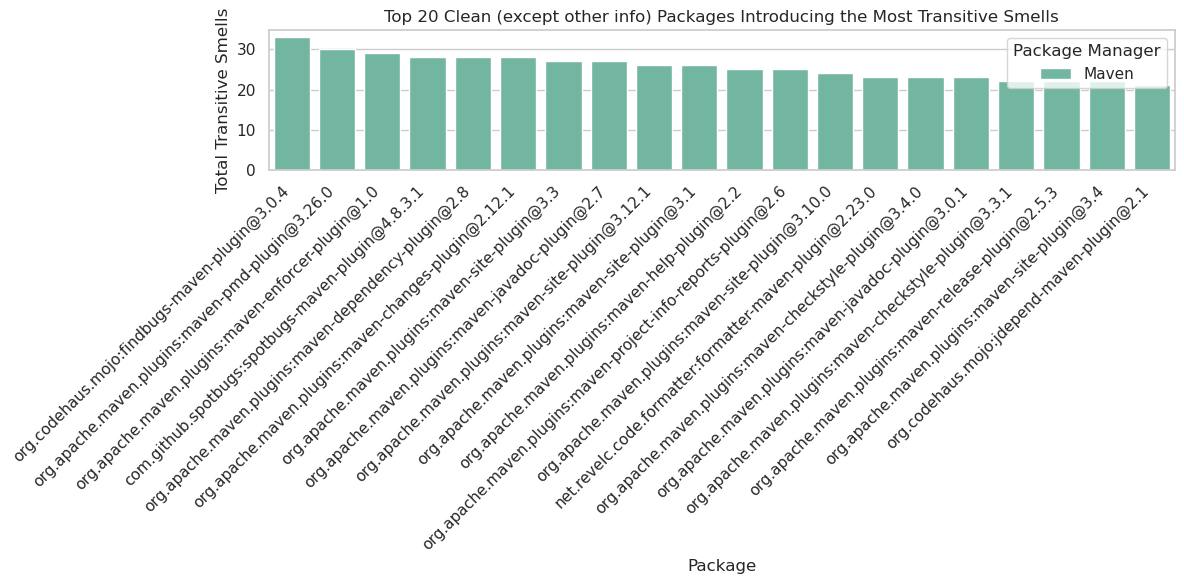

In [21]:
top_n = 20
df_top = df_taint.head(top_n)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_top, x="Package", y="Total Transitive Smells", hue="Package Manager",
                 palette={"Maven": "#66c2a5", "Npm": "#fc8d62"})

plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Transitive Smells")
plt.title(f"Top {top_n} Clean (except other info) Packages Introducing the Most Transitive Smells")
plt.tight_layout()
plt.show()

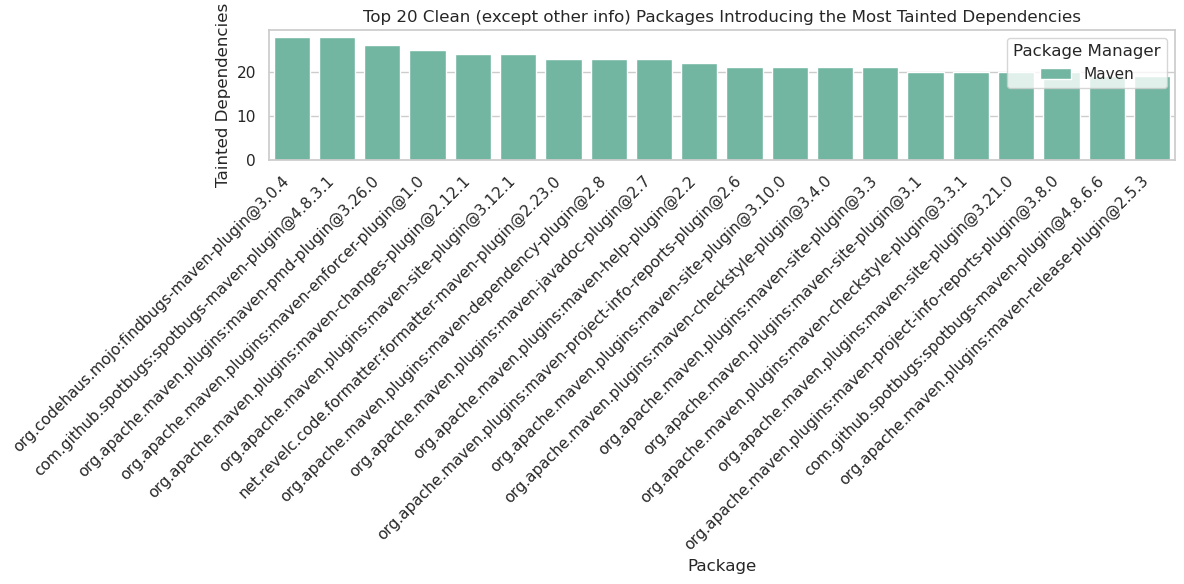

In [22]:
top_n = 20
df_top = df_taint.sort_values(by="Tainted Dependencies", ascending=False).head(top_n)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_top, x="Package", y="Tainted Dependencies", hue="Package Manager",
                 palette={"Maven": "#66c2a5", "Npm": "#fc8d62"})

plt.xticks(rotation=45, ha="right")
plt.ylabel("Tainted Dependencies")
plt.title(f"Top {top_n} Clean (except other info) Packages Introducing the Most Tainted Dependencies")
plt.tight_layout()
plt.show()


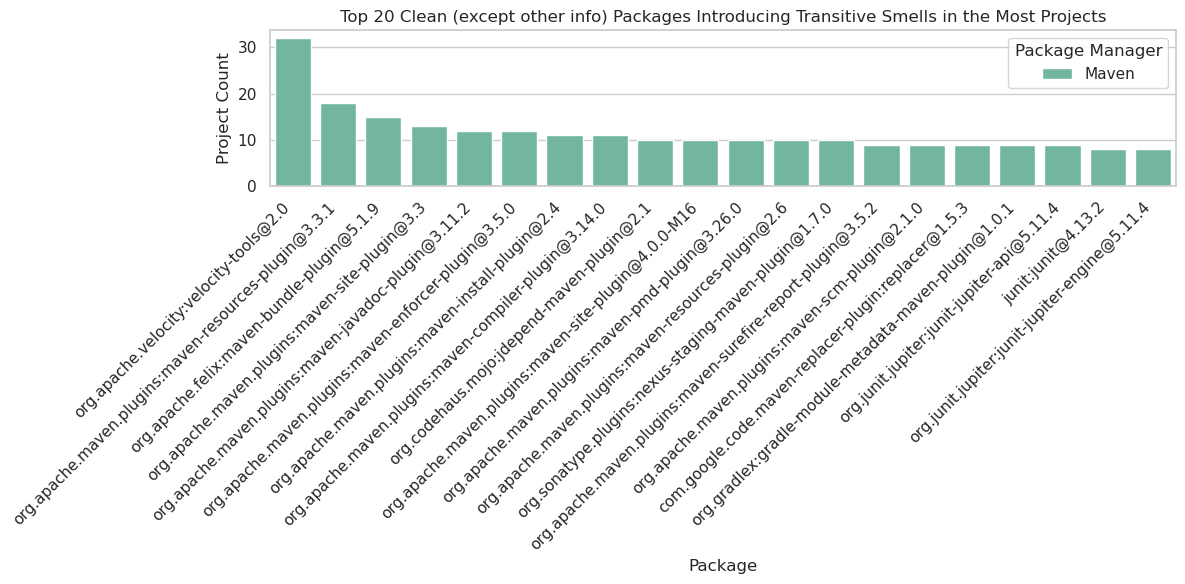

In [23]:
top_n = 20
df_top = df_taint.sort_values(by="Occurrence Count", ascending=False).head(top_n)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_top, x="Package", y="Occurrence Count", hue="Package Manager",
                 palette={"Maven": "#66c2a5", "Npm": "#fc8d62"})

plt.xticks(rotation=45, ha="right")
plt.ylabel("Project Count")
plt.title(f"Top {top_n} Clean (except other info) Packages Introducing Transitive Smells in the Most Projects")
plt.tight_layout()
plt.show()

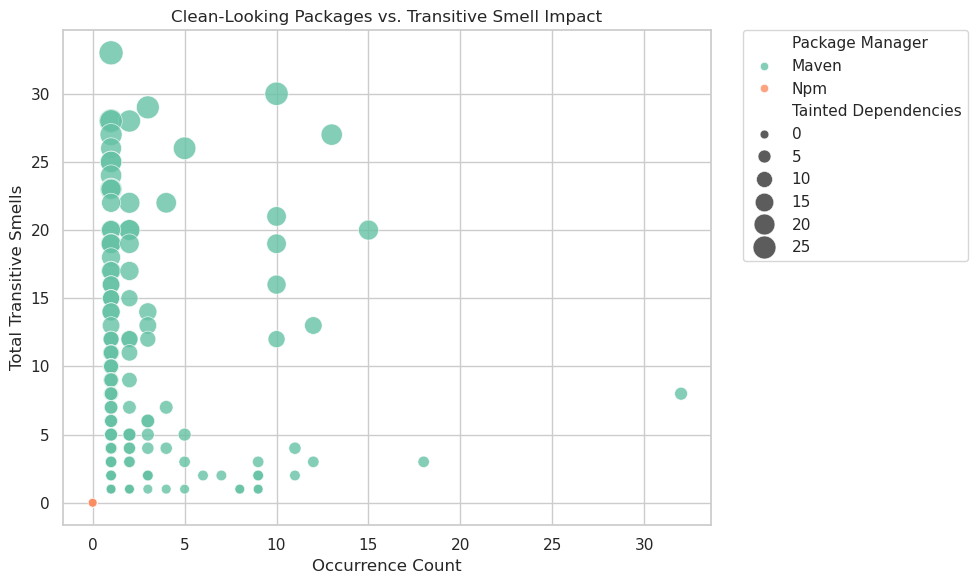

In [24]:
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(
    data=df_taint,
    x="Occurrence Count",
    y="Total Transitive Smells",
    hue="Package Manager",
    size="Tainted Dependencies",
    palette={"Maven": "#66c2a5", "Npm": "#fc8d62"},
    sizes=(40, 300),
    alpha=0.8
)

plt.title("Clean-Looking Packages vs. Transitive Smell Impact")
plt.xlabel("Occurrence Count")
plt.ylabel("Total Transitive Smells")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


X Threshold: 4.62840579710145, Y Threshold: 0.7750724637681159


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

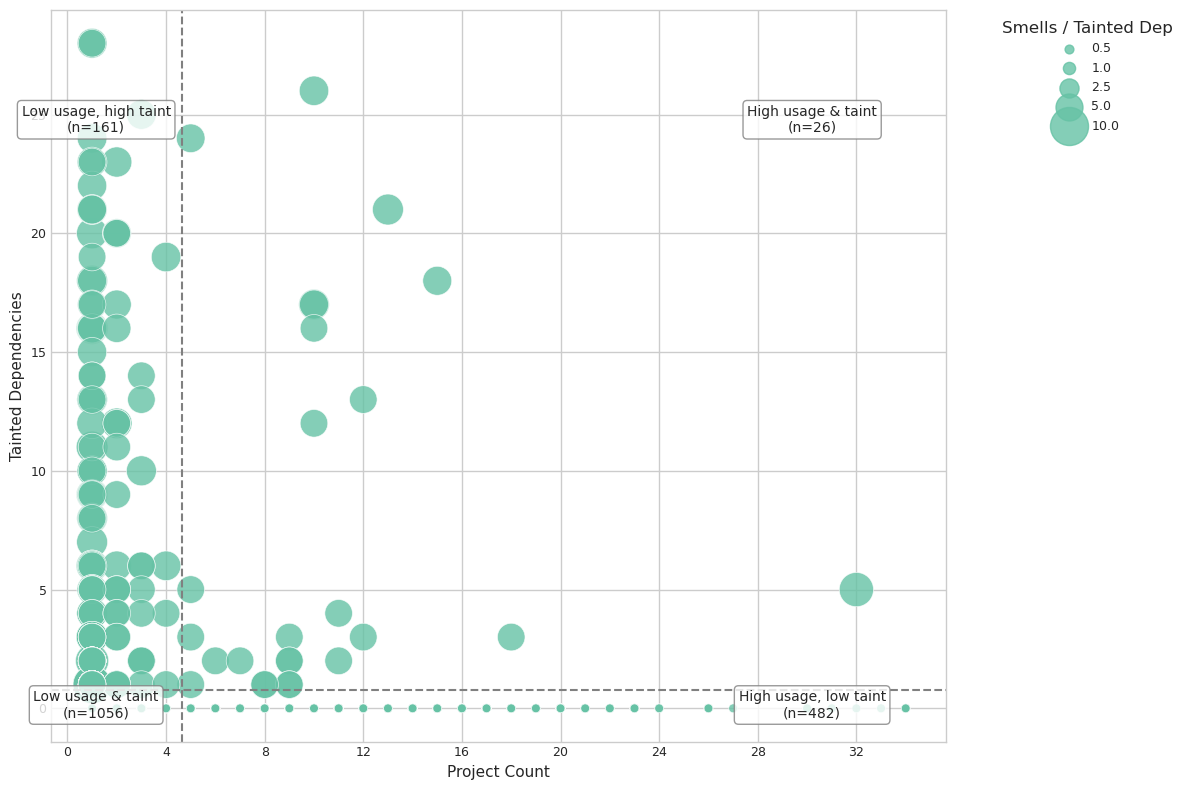

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

# Compute median thresholds
df_maven = df_taint[df_taint["Package Manager"] == "Maven"].copy()
x_thresh = df_maven["Project Count"].mean()
y_thresh = df_maven["Tainted Dependencies"].mean()
print(f"X Threshold: {x_thresh}, Y Threshold: {y_thresh}")

# Classify each package into a quadrant
def assign_quadrant(row):
    if row["Project Count"] >= x_thresh and row["Tainted Dependencies"] >= y_thresh:
        return "High usage & taint"
    elif row["Project Count"] >= x_thresh:
        return "High usage, low taint"
    elif row["Tainted Dependencies"] >= y_thresh:
        return "Low usage, high taint"
    else:
        return "Low usage & taint"

df_maven["Quadrant"] = df_maven.apply(assign_quadrant, axis=1)

# Count packages per quadrant
quadrant_counts = df_maven["Quadrant"].value_counts()

# Compute smell density (smells per tainted dependency), avoiding division by zero
df_maven["Smell Density"] = df_maven.apply(
    lambda row: row["Total Transitive Smells"] / row["Tainted Dependencies"]
    if row["Tainted Dependencies"] > 0 else 0,
    axis=1
)

# Plot directly with this as the size
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_maven,
    x="Project Count",
    y="Tainted Dependencies",
    size="Smell Density",
    sizes=(40, 750),
    alpha=0.8,
    legend="brief",
    color="#66c2a5"
)

# Customize size legend to show actual quotient values
# We'll pick a few representative values from the data
representative_values = [0.5, 1, 2.5, 5, 10]
handles = []
for val in representative_values:
    handles.append(plt.scatter([], [], s=(val - min(representative_values)) / (max(representative_values) - min(representative_values)) * (750 - 40) + 40,
                               color="#66c2a5", alpha=0.8, label=f"{val:.1f}"))

# Draw threshold lines
plt.axvline(x=x_thresh, color='gray', linestyle='--')
plt.axhline(y=y_thresh, color='gray', linestyle='--')

# Add quadrant labels
ax = plt.gca()
corners = {
    "High usage & taint": (0.85, 0.85),
    "High usage, low taint": (0.85, 0.05),
    "Low usage, high taint": (0.05, 0.85),
    "Low usage & taint": (0.05, 0.05)
}
for label, (x, y) in corners.items():
    count = quadrant_counts.get(label, 0)
    ax.text(x, y, f"{label}\n(n={count})", transform=ax.transAxes, fontsize=10,
            va='center', ha='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Final labels and custom legend
plt.xlabel("Project Count")
plt.ylabel("Tainted Dependencies")
plt.legend(title="Smells / Tainted Dep", handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

# Save high-usage-taint table
pd.set_option('display.max_colwidth', None)
df_high_usage_taint = df_maven[df_maven["Quadrant"] == "High usage & taint"]
df_high_usage_taint = df_high_usage_taint[["Package", "Project Count", "Tainted Dependencies", "Total Transitive Smells"]]
df_high_usage_taint = df_high_usage_taint.sort_values(by="Total Transitive Smells", ascending=False).reset_index(drop=True)
df_high_usage_taint.to_csv("high_usage_taint.csv", index=False)

In [34]:
maven_smells = extract_packages(maven_taint_analysis, "Maven", all_maven_deps_list)
npm_smells = extract_packages(npm_taint_analysis, "Npm", all_npm_deps_list)
# Compare how many packages have other_info in their Direct Smells in maven and npm
df_maven = pd.DataFrame(maven_smells)
df_npm = pd.DataFrame(npm_smells)
# print how many have other_info in their Direct Smells in maven
df_maven_other_info = df_maven[df_maven['Direct Smells'].apply(lambda x: 'other_info' in x)]
df_npm_other_info = df_npm[df_npm['Direct Smells'].apply(lambda x: 'other_info' in x)]

print(f"Maven packages with 'other_info' in Direct Smells: {len(df_maven_other_info)}")
print(f"Npm packages with 'other_info' in Direct Smells: {len(df_npm_other_info)}")

df_maven_not_other_info = df_maven[~df_maven['Direct Smells'].apply(lambda x: 'other_info' in x)]
df_npm_not_other_info = df_npm[~df_npm['Direct Smells'].apply(lambda x: 'other_info' in x)]

print(f"Maven packages without 'other_info' in non-empty Direct Smells: {len(df_maven_not_other_info)}")
print(f"Npm packages without 'other_info' in non-empty Direct Smells: {len(df_npm_not_other_info)}")

Maven packages with 'other_info' in Direct Smells: 872
Npm packages with 'other_info' in Direct Smells: 8
Maven packages without 'other_info' in non-empty Direct Smells: 1673
Npm packages without 'other_info' in non-empty Direct Smells: 7664


Direct Smells
inaccessible_commit_sha    395
no_code_signature           54
no_source_code_url          46
repo_url_404                18
invalid_code_signature      11
Name: count, dtype: int64


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

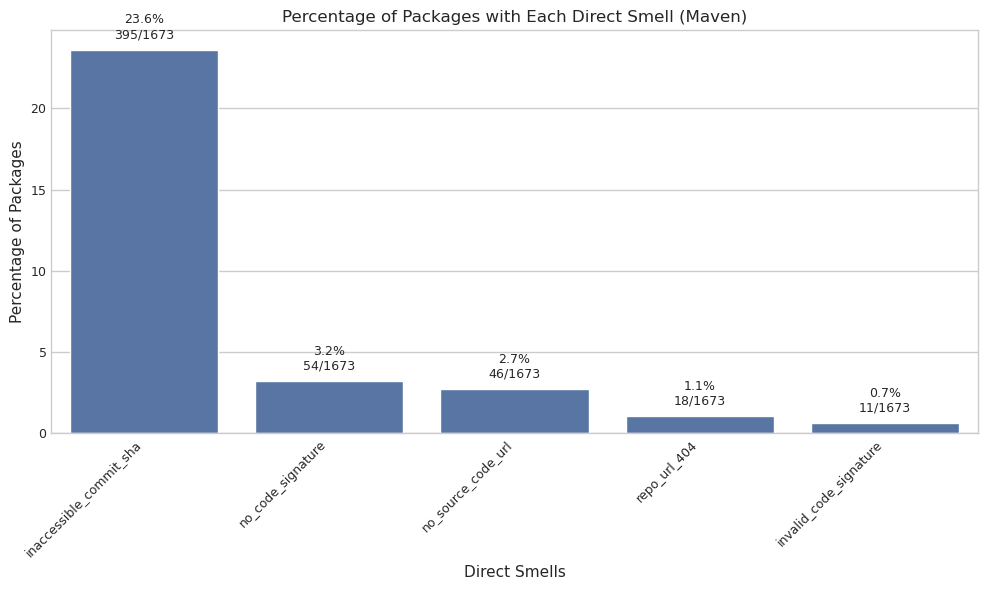

In [35]:
direct_smells = df_maven_not_other_info['Direct Smells'].explode().value_counts()
print(direct_smells)
total_packages = len(df_maven_not_other_info)
direct_smells_percentage = (direct_smells / total_packages) * 100
direct_smells_percentage = direct_smells_percentage.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=direct_smells_percentage.index, y=direct_smells_percentage.values)

# Annotate each bar
for i, (label, percent) in enumerate(direct_smells_percentage.items()):
    count = direct_smells[label]
    ax.text(
        i, percent + 0.5,  # small vertical offset
        f"{percent:.1f}%\n{count}/{total_packages}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of Packages")
plt.title("Percentage of Packages with Each Direct Smell (Maven)")
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

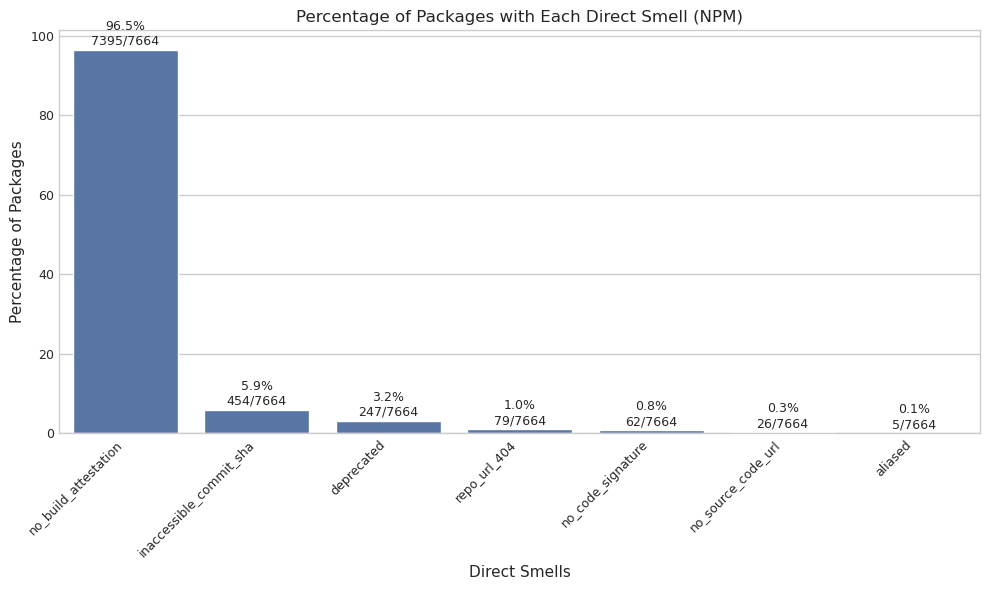

In [36]:
direct_smells = df_npm_not_other_info['Direct Smells'].explode().value_counts()
total_packages = len(df_npm_not_other_info)
direct_smells_percentage = (direct_smells / total_packages) * 100
direct_smells_percentage = direct_smells_percentage.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=direct_smells_percentage.index, y=direct_smells_percentage.values)

# Annotate each bar
for i, (label, percent) in enumerate(direct_smells_percentage.items()):
    count = direct_smells[label]
    ax.text(
        i, percent + 0.5,  # small vertical offset
        f"{percent:.1f}%\n{count}/{total_packages}",
        ha='center', va='bottom', fontsize=9
    )

plt.xticks(rotation=45, ha="right")
plt.ylabel("Percentage of Packages")
plt.title("Percentage of Packages with Each Direct Smell (NPM)")
plt.tight_layout()
plt.show()

Unique smells in Direct Smells:
['other_info' 'no_code_signature' 'no_source_code_url'
 'inaccessible_commit_sha' nan 'invalid_code_signature' 'repo_url_404'
 'no_build_attestation' 'deprecated' 'aliased']


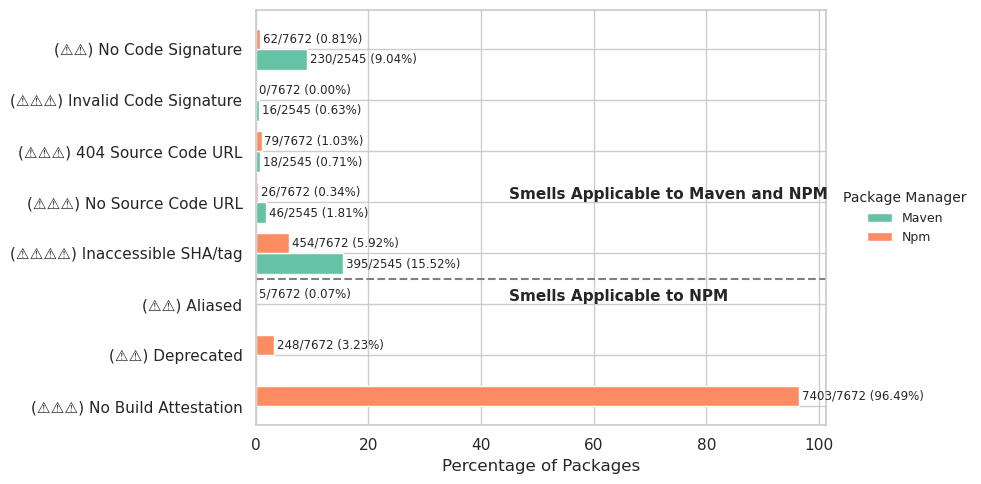

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Smell display labels (same as first plot)
smell_labels = {
    "inaccessible_commit_sha": "(⚠️⚠️⚠️⚠️) Inaccessible SHA/tag",
    "no_source_code_url": "(⚠️⚠️⚠️) No Source Code URL",
    "repo_url_404": "(⚠️⚠️⚠️) 404 Source Code URL",
    "no_build_attestation": "(⚠️⚠️⚠️) No Build Attestation",
    "invalid_code_signature": "(⚠️⚠️⚠️) Invalid Code Signature",
    "no_code_signature": "(⚠️⚠️) No Code Signature",
    "deprecated": "(⚠️⚠️) Deprecated",
    "aliased": "(⚠️⚠️) Aliased",
}

# Define smell exclusions for Maven
forced_nas = {"aliased", "deprecated", "no_build_attestation"}

# Combine Maven and NPM into a single DataFrame
df_maven = df_maven.copy()
df_maven["Package Manager"] = "Maven"

df_npm = df_npm.copy()
df_npm["Package Manager"] = "Npm"

df_all = pd.concat([df_maven, df_npm], ignore_index=True)

# Explode the Direct Smells
df_exploded = df_all.explode("Direct Smells")

# print every single smellpresent in Direct Smells
print("Unique smells in Direct Smells:")
print(df_exploded["Direct Smells"].unique())

# Get total package counts per manager
totals = df_all.groupby("Package Manager")["Package"].nunique().to_dict()

# Compute smell counts
smell_counts = (
    df_exploded
    .groupby(["Package Manager", "Direct Smells"])["Package"]
    .nunique()
    .reset_index(name="Count")
)

# Add percent
smell_counts["Total"] = smell_counts["Package Manager"].map(totals)
smell_counts["Percent"] = (smell_counts["Count"] / smell_counts["Total"] * 100).round(2)

# Pivot to wide format to make merging easier
smells = sorted(set(df_exploded["Direct Smells"].dropna()))
managers = ["Maven", "Npm"]

plot_rows = []
for smell in smells:
    for manager in managers:
        total = totals.get(manager, 0)
        applicable = not (manager == "Maven" and smell in forced_nas)
        row = smell_counts[
            (smell_counts["Package Manager"] == manager) &
            (smell_counts["Direct Smells"] == smell)
        ]
        if not row.empty:
            count = int(row["Count"].values[0])
            percent = float(row["Percent"].values[0])
        else:
            count = 0
            percent = 0.0
        plot_rows.append({
            "Smell": smell,
            "Smell Label": smell_labels.get(smell, smell),  # Mapped label
            "Package Manager": manager,
            "Count": count,
            "Percent": percent,
            "Total": total,
            "Applicable": applicable
        })

df_plot = pd.DataFrame(plot_rows)

# Sort smells: applicable ones first
applicable_smells = [k for k in smell_labels if k not in forced_nas]
not_applicable_smells = [k for k in smell_labels if k in forced_nas]
sorted_smells = not_applicable_smells + applicable_smells
sorted_labels = [smell_labels[k] for k in sorted_smells]

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, max(5, len(smell_labels) * 0.6)))

bar_width = 0.4
y_labels = sorted_labels
y_positions = range(len(y_labels))

colors = {"Maven": "#66c2a5", "Npm": "#fc8d62"}
position_map = {
    ("Maven", i): i - bar_width / 2
    for i in y_positions
}
position_map.update({
    ("Npm", i): i + bar_width / 2
    for i in y_positions
})

for i, smell_label in enumerate(y_labels):
    smell = sorted_smells[i]
    for manager in managers:
        match = df_plot[
            (df_plot["Smell"] == smell) &
            (df_plot["Package Manager"] == manager)
        ]
        if not match.empty:
            row = match.iloc[0]
        else:
            # Fallback row in case data is missing
            row = {
                "Percent": 0.0,
                "Count": 0,
                "Total": totals.get(manager, 0),
                "Applicable": not (manager == "Maven" and smell in forced_nas)
            }

        pos = position_map[(manager, i)]

        if not row["Applicable"]:
            continue  # Skip non-applicable smells
        else:
            plt.barh(pos, row["Percent"], height=bar_width, color=colors[manager])
            label = f"{row['Count']}/{row['Total']} ({row['Percent']:.2f}%)"
            plt.text(row["Percent"] + 0.5, pos, label, va='center', fontsize=8.5)


# Vertical separator between applicable and N/A smells
if not_applicable_smells:
    separator_index = len(not_applicable_smells) - 0.5
    plt.axhline(y=separator_index, color='gray', linestyle='--', linewidth=1.5)

    # Add section labels
    plt.text(45, len(not_applicable_smells) + 1, "Smells Applicable to Maven and NPM", fontsize=11, weight='bold', va='bottom', ha='left')
    plt.text(45, len(not_applicable_smells) - 1, "Smells Applicable to NPM", fontsize=11, weight='bold', va='bottom', ha='left')

# Final formatting
plt.yticks(ticks=range(len(y_labels)), labels=y_labels)
plt.xlabel("Percentage of Packages")
# plt.title("Number of Packages with Each Smell")

legend_handles = [
    Patch(facecolor=colors["Maven"], label="Maven"),
    Patch(facecolor=colors["Npm"], label="Npm"),
    # Patch(facecolor='none', edgecolor='red', hatch='//', label='Not Applicable')
]
plt.legend(
    handles=legend_handles,
    title="Package Manager",
    fontsize=9,
    title_fontsize=10,
    loc='center left',
    bbox_to_anchor=(1.01, 0.5)
)

plt.tight_layout()
plt.show()

In [38]:
%run diff_analysis_script.py


Analyzing maven-lockfile-runs...
Analyzing run before action: results_2025-05-16-14-13-13
Total packages: 486
Analyzing run after action (no config): results_2025-05-16-15-04-33
Total packages: 466
Analyzing run after action (with config): results_2025-05-16-15-44-48
Total packages: 466
Length of run1 packages: 105
Length of run2 packages: 94
No. of removed packages: 37
No. of added packages: 26
Created comparison report (before vs after no config): results/outcomes/maven-lockfile-runs_comparison_before_vs_after_no_config.json

===== Before vs After (No Config) =====
Total packages: 486 → 466 (-20)
Total smells: 114 → 99 (-15)

Smell changes by type:
  inaccessible_commit_sha: 67 → 75 (+8)
  repo_url_404: 9 → 5 (-4)
  no_source_code_url: 1 → 1 (+0)
  no_code_signature: 37 → 18 (-19)

Package changes:
  Improved packages (fewer smells): 0
  Unchanged overall packages: False
  Unchanged smelly packages (same smells): 68
  Completely removed packages with smells: 37
  Completely added pa

In [39]:
import matplotlib.ticker as mtick

# Set the style for academic paper visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['figure.titlesize'] = 14

# Create directory for visualizations
os.makedirs('visualizations', exist_ok=True)

# Define paths for the JSON files
base_dir = "maven-lockfile-runs"
comparison_files = {
    'before_vs_after_no_config': f"{OUTCOMES_FOLDER}/{base_dir}_comparison_before_vs_after_no_config.json",
    'before_vs_after_with_config': f"{OUTCOMES_FOLDER}/{base_dir}_comparison_before_vs_after_with_config.json",
    'no_config_vs_with_config': f"{OUTCOMES_FOLDER}/{base_dir}_comparison_after_no_config_vs_after_with_config.json"
}

# Load the data
comparisons = {}
for key, path in comparison_files.items():
    with open(path, 'r') as f:
        comparisons[key] = json.load(f)

/tmp/ipykernel_219176/1284095986.py:66: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((col, -row), 0.9, 0.9,
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found 

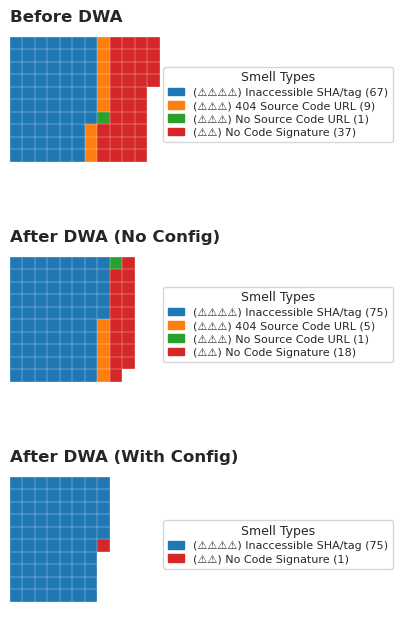

In [40]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math

def create_variable_size_waffle_charts(comparisons, grid_rows=10):
    smell_labels = {
        'inaccessible_commit_sha': '(⚠️⚠️⚠️⚠️) Inaccessible SHA/tag',
        'no_source_code_url': '(⚠️⚠️⚠️) No Source Code URL',
        'repo_url_404': '(⚠️⚠️⚠️) 404 Source Code URL',
        'no_build_attestation': '(⚠️⚠️⚠️) No Build Attestation',
        'invalid_code_signature': '(⚠️⚠️⚠️) Invalid Code Signature',
        'no_code_signature': '(⚠️⚠️) No Code Signature',
        'deprecated': '(⚠️⚠️) Deprecated',
        'aliased': '(⚠️⚠️) Aliased'
    }

    severity_order = {
        'inaccessible_commit_sha': 4,
        'no_source_code_url': 3,
        'repo_url_404': 3,
        'no_build_attestation': 3,
        'invalid_code_signature': 3,
        'no_code_signature': 2,
        'deprecated': 2,
        'aliased': 2
    }

    configs = {
        'Before DWA': comparisons['before_vs_after_with_config']['smell_counts_before'],
        'After DWA (No Config)': comparisons['before_vs_after_no_config']['smell_counts_after'],
        'After DWA (With Config)': comparisons['before_vs_after_with_config']['smell_counts_after']
    }

    smell_keys = sorted(set().union(*[c.keys() for c in configs.values()]),
                        key=lambda s: severity_order.get(s, 0), reverse=True)

    cmap = plt.get_cmap("tab10")
    smell_colors = {k: cmap(i % 10) for i, k in enumerate(smell_keys)}

    # Determine max grid width for consistent left alignment
    grid_cols_list = []
    for smell_counts in configs.values():
        total = sum(smell_counts.get(k, 0) for k in smell_keys)
        grid_cols_list.append(math.ceil(total / grid_rows))
    grid_cols_max = max(grid_cols_list)

    fig, axes = plt.subplots(len(configs), 1, figsize=(12, 2.5 * len(configs)))
    fig.subplots_adjust(hspace=0.6)

    if len(configs) == 1:
        axes = [axes]

    for ax, (title, smell_counts) in zip(axes, configs.items()):
        total = sum(smell_counts.get(k, 0) for k in smell_keys)
        grid_cols = math.ceil(total / grid_rows)

        cells = []
        for k in smell_keys:
            cells.extend([k] * smell_counts.get(k, 0))

        for idx, smell in enumerate(cells):
            col = idx // grid_rows
            row = idx % grid_rows
            color = smell_colors.get(smell, '#f0f0f0')
            ax.add_patch(plt.Rectangle((col, -row), 0.9, 0.9,
                                       color=color,
                                       edgecolor='white', linewidth=0.5))

        ax.set_xlim(0, grid_cols_max)
        ax.set_ylim(-grid_rows, 1)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(title, loc='left', fontsize=12, fontweight='bold', pad=10)

        legend_patches = [
            mpatches.Patch(
                color=smell_colors[k],
                label=f"{smell_labels.get(k, k)} ({smell_counts.get(k, 0)})"
            )
            for k in smell_keys if smell_counts.get(k, 0) > 0
        ]
        ax.legend(
            handles=legend_patches,
            loc='center left',
            bbox_to_anchor=(1, 0.5),
            title='Smell Types',
            title_fontsize=9,
            fontsize=8,
            handlelength=1.5,
            borderaxespad=0.3,
            labelspacing=0.3,
            frameon=True
        )

    plt.show()
create_variable_size_waffle_charts(comparisons)